In [1]:
%config Completer.use_jedi = False

In [137]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
df = pd.read_csv('../data/All_Pulls.csv')

In [120]:
df['pull_creation_date'] = pd.to_datetime(df['pull_creation_date'], format='%Y-%m-%d %H:%M:%S')
df['adoption_date'] = pd.to_datetime(df['adoption_date'], format='%Y-%m-%d %H:%M:%S')
df['start_date'] = pd.to_datetime(df['start_date'], format='%Y-%m-%d %H:%M:%S')
df['end_date'] = pd.to_datetime(df['end_date'], format='%Y-%m-%d %H:%M:%S')

In [127]:
df

,repository_url,user_login,user_name,user_location,pull_number,pull_current_state,pull_creation_date,pull_closing_date,pull_merged,pull_merge_date,...,disagree,adoption_date,start_date,end_date,is_person,forks,stars,total_contributors,size,age
0,vercel/hyper,dependabot[bot],NaN,NaN,5701,closed,2021-06-28 11:07:51,2021-06-28 11:27:32,True,2021-06-28 11:27:32,...,False,NaT,NaT,NaT,NaN,2986,36184,251,18819,155757519
1,vercel/hyper,dependabot[bot],NaN,NaN,5700,closed,2021-06-28 11:07:12,2021-06-28 11:27:48,True,2021-06-28 11:27:48,...,False,NaT,NaT,NaT,NaN,2986,36184,251,18819,155757519
2,vercel/hyper,dependabot[bot],NaN,NaN,5699,closed,2021-06-28 11:06:40,2021-06-28 11:28:11,True,2021-06-28 11:28:11,...,False,NaT,NaT,NaT,NaN,2986,36184,251,18819,155757519
3,vercel/hyper,dependabot[bot],NaN,NaN,5698,closed,2021-06-28 11:06:17,2021-06-28 11:36:11,True,2021-06-28 11:36:11,...,False,NaT,NaT,NaT,NaN,2986,36184,251,18819,155757519
4,vercel/hyper,dependabot[bot],NaN,NaN,5697,closed,2021-06-28 11:05:44,2021-06-28 11:28:24,True,2021-06-28 11:28:24,...,False,NaT,NaT,NaT,NaN,2986,36184,251,18819,155757519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192843,fabricjs/fabric.js,diogocampos,Diogo Campos,"Porto Alegre, RS, Brazil",69,closed,2011-10-29 19:13:36,2011-10-29 19:37:04,True,2011-10-29 19:37:04,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192844,fabricjs/fabric.js,everson,Johnny Everson,Brazil,59,closed,2011-09-30 10:48:20,2011-09-30 22:22:10,True,2011-09-30 22:22:10,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192845,fabricjs/fabric.js,daniel-o,Daniel Owens,"Austin, TX",52,closed,2011-09-07 04:17:55,2011-09-20 18:27:11,False,NaN,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192846,fabricjs/fabric.js,dawehner,Daniel Wehner,NaN,46,closed,2011-08-21 08:12:55,2011-08-21 20:27:42,False,NaN,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122


In [128]:
# filter 1: bots
f1 = df.dropna(subset=['gender', 'ethnicity'])
f1

,repository_url,user_login,user_name,user_location,pull_number,pull_current_state,pull_creation_date,pull_closing_date,pull_merged,pull_merge_date,...,disagree,adoption_date,start_date,end_date,is_person,forks,stars,total_contributors,size,age
15,vercel/hyper,LabhanshAgrawal,Labhansh Agrawal,"Bangalore, India",5678,closed,2021-06-20 13:56:15,2021-06-22 08:39:34,True,2021-06-22 08:39:33,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
53,vercel/hyper,matheuss,Matheus Fernandes,"Brno, Czech Republic",5623,closed,2021-06-03 01:54:56,2021-06-03 03:02:19,True,2021-06-03 03:02:19,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
66,vercel/hyper,qmutz,lntel,Las Vegas,5606,closed,2021-05-25 17:28:14,2021-05-26 03:03:50,False,NaN,...,True,NaT,NaT,NaT,False,2986,36184,251,18819,155757519
89,vercel/hyper,T-O-R-U-S,T•Ø•R•Ü•S,NaN,5577,closed,2021-05-12 03:19:56,2021-05-12 21:04:16,True,2021-05-12 21:04:16,...,True,NaT,NaT,NaT,False,2986,36184,251,18819,155757519
109,vercel/hyper,LabhanshAgrawal,Labhansh Agrawal,"Bangalore, India",5555,closed,2021-05-10 07:22:38,2021-05-10 09:14:11,True,2021-05-10 09:14:11,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192843,fabricjs/fabric.js,diogocampos,Diogo Campos,"Porto Alegre, RS, Brazil",69,closed,2011-10-29 19:13:36,2011-10-29 19:37:04,True,2011-10-29 19:37:04,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192844,fabricjs/fabric.js,everson,Johnny Everson,Brazil,59,closed,2011-09-30 10:48:20,2011-09-30 22:22:10,True,2011-09-30 22:22:10,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192845,fabricjs/fabric.js,daniel-o,Daniel Owens,"Austin, TX",52,closed,2011-09-07 04:17:55,2011-09-20 18:27:11,False,NaN,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192846,fabricjs/fabric.js,dawehner,Daniel Wehner,NaN,46,closed,2011-08-21 08:12:55,2011-08-21 20:27:42,False,NaN,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122


In [129]:
# filter 2: non-person
f2 = f1[f1['is_person'] == True]
f2

,repository_url,user_login,user_name,user_location,pull_number,pull_current_state,pull_creation_date,pull_closing_date,pull_merged,pull_merge_date,...,disagree,adoption_date,start_date,end_date,is_person,forks,stars,total_contributors,size,age
15,vercel/hyper,LabhanshAgrawal,Labhansh Agrawal,"Bangalore, India",5678,closed,2021-06-20 13:56:15,2021-06-22 08:39:34,True,2021-06-22 08:39:33,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
53,vercel/hyper,matheuss,Matheus Fernandes,"Brno, Czech Republic",5623,closed,2021-06-03 01:54:56,2021-06-03 03:02:19,True,2021-06-03 03:02:19,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
109,vercel/hyper,LabhanshAgrawal,Labhansh Agrawal,"Bangalore, India",5555,closed,2021-05-10 07:22:38,2021-05-10 09:14:11,True,2021-05-10 09:14:11,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
110,vercel/hyper,LabhanshAgrawal,Labhansh Agrawal,"Bangalore, India",5553,closed,2021-05-10 04:57:49,2021-05-10 05:19:32,True,2021-05-10 05:19:32,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
112,vercel/hyper,LabhanshAgrawal,Labhansh Agrawal,"Bangalore, India",5549,closed,2021-05-07 16:39:28,2021-05-07 16:53:33,True,2021-05-07 16:53:32,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192843,fabricjs/fabric.js,diogocampos,Diogo Campos,"Porto Alegre, RS, Brazil",69,closed,2011-10-29 19:13:36,2011-10-29 19:37:04,True,2011-10-29 19:37:04,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192844,fabricjs/fabric.js,everson,Johnny Everson,Brazil,59,closed,2011-09-30 10:48:20,2011-09-30 22:22:10,True,2011-09-30 22:22:10,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192845,fabricjs/fabric.js,daniel-o,Daniel Owens,"Austin, TX",52,closed,2011-09-07 04:17:55,2011-09-20 18:27:11,False,NaN,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192846,fabricjs/fabric.js,dawehner,Daniel Wehner,NaN,46,closed,2011-08-21 08:12:55,2011-08-21 20:27:42,False,NaN,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122


In [130]:
# filter 3: white men
f3 = f2[~((f2['gender'] == 'male') & (f2['ethnicity'] == 'white'))]
f3

,repository_url,user_login,user_name,user_location,pull_number,pull_current_state,pull_creation_date,pull_closing_date,pull_merged,pull_merge_date,...,disagree,adoption_date,start_date,end_date,is_person,forks,stars,total_contributors,size,age
15,vercel/hyper,LabhanshAgrawal,Labhansh Agrawal,"Bangalore, India",5678,closed,2021-06-20 13:56:15,2021-06-22 08:39:34,True,2021-06-22 08:39:33,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
53,vercel/hyper,matheuss,Matheus Fernandes,"Brno, Czech Republic",5623,closed,2021-06-03 01:54:56,2021-06-03 03:02:19,True,2021-06-03 03:02:19,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
109,vercel/hyper,LabhanshAgrawal,Labhansh Agrawal,"Bangalore, India",5555,closed,2021-05-10 07:22:38,2021-05-10 09:14:11,True,2021-05-10 09:14:11,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
110,vercel/hyper,LabhanshAgrawal,Labhansh Agrawal,"Bangalore, India",5553,closed,2021-05-10 04:57:49,2021-05-10 05:19:32,True,2021-05-10 05:19:32,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
112,vercel/hyper,LabhanshAgrawal,Labhansh Agrawal,"Bangalore, India",5549,closed,2021-05-07 16:39:28,2021-05-07 16:53:33,True,2021-05-07 16:53:32,...,True,NaT,NaT,NaT,True,2986,36184,251,18819,155757519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192823,fabricjs/fabric.js,pawelnguyen,Paweł Nguyen,Warsaw,174,closed,2012-06-05 12:37:35,2012-06-08 10:34:29,False,NaN,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192824,fabricjs/fabric.js,konieczkow,Maciek Gajewski,"London, UK",170,closed,2012-05-29 11:23:07,2012-05-30 11:52:44,True,2012-05-30 11:52:44,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192825,fabricjs/fabric.js,konieczkow,Maciek Gajewski,"London, UK",169,closed,2012-05-29 10:47:27,2012-05-29 10:57:01,True,2012-05-29 10:57:01,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192830,fabricjs/fabric.js,baltauger,Balthazar Auger,Buenos Aires,155,closed,2012-04-24 21:06:49,2012-05-13 14:43:06,True,2012-05-13 14:43:06,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122


In [131]:
# f4: has CoC
f4 = f3[~f3['adoption_date'].isnull()]
f4

,repository_url,user_login,user_name,user_location,pull_number,pull_current_state,pull_creation_date,pull_closing_date,pull_merged,pull_merge_date,...,disagree,adoption_date,start_date,end_date,is_person,forks,stars,total_contributors,size,age
2382,jquery/jquery,csmadhav,C S Madhav,hyderabad,4405,open,2019-05-19 20:01:04,NaN,False,NaN,...,True,2017-11-27 11:41:00,2014-05-18 23:22:00,2021-06-08 00:00:00,True,20027,55103,283,30932,384338386
2385,jquery/jquery,preethi26,Preethi Pravalika,india,3501,open,2017-01-16 09:21:15,NaN,False,NaN,...,True,2017-11-27 11:41:00,2014-05-18 23:22:00,2021-06-08 00:00:00,True,20027,55103,283,30932,384338386
2426,jquery/jquery,qixinwuchen,Lucy,NaN,4785,closed,2020-09-05 09:19:58,2020-09-05 09:25:18,False,NaN,...,True,2017-11-27 11:41:00,2014-05-18 23:22:00,2021-06-08 00:00:00,True,20027,55103,283,30932,384338386
2438,jquery/jquery,natipo,Natalia Sroka,NaN,4757,closed,2020-07-21 12:56:35,2020-07-27 20:01:56,True,2020-07-27 20:01:56,...,True,2017-11-27 11:41:00,2014-05-18 23:22:00,2021-06-08 00:00:00,True,20027,55103,283,30932,384338386
2441,jquery/jquery,Necmttn,Necmettin Karakaya,Bali,4752,closed,2020-07-18 13:19:35,2020-07-22 14:12:55,True,2020-07-22 14:12:54,...,True,2017-11-27 11:41:00,2014-05-18 23:22:00,2021-06-08 00:00:00,True,20027,55103,283,30932,384338386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192823,fabricjs/fabric.js,pawelnguyen,Paweł Nguyen,Warsaw,174,closed,2012-06-05 12:37:35,2012-06-08 10:34:29,False,NaN,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192824,fabricjs/fabric.js,konieczkow,Maciek Gajewski,"London, UK",170,closed,2012-05-29 11:23:07,2012-05-30 11:52:44,True,2012-05-30 11:52:44,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192825,fabricjs/fabric.js,konieczkow,Maciek Gajewski,"London, UK",169,closed,2012-05-29 10:47:27,2012-05-29 10:57:01,True,2012-05-29 10:57:01,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192830,fabricjs/fabric.js,baltauger,Balthazar Auger,Buenos Aires,155,closed,2012-04-24 21:06:49,2012-05-13 14:43:06,True,2012-05-13 14:43:06,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122


In [162]:
projects = f4['repository_url'].unique().tolist()
p = projects[0]
pdf = f4[f4['repository_url'] == p]
train = pdf[(pdf['pull_creation_date'] > pdf['start_date']) & (pdf['pull_creation_date'] < pdf['adoption_date'])]
holdout = pdf[(pdf['pull_creation_date'] > pdf['adoption_date']) & (pdf['pull_creation_date'] < pdf['end_date'])]

### all users

In [169]:
tr_data = train.groupby(pd.Grouper(key='pull_creation_date', freq='M')).size().reset_index(name='count')

In [170]:
hld_data = holdout.groupby(pd.Grouper(key='pull_creation_date', freq='M')).size().reset_index(name='count')

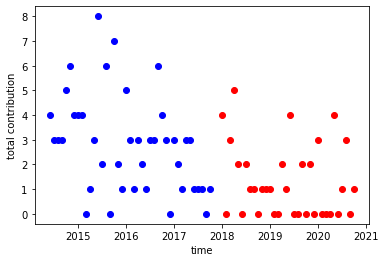

In [171]:
plt.scatter(tr_data['pull_creation_date'], tr_data['count'], color='blue')
plt.scatter(hld_data['pull_creation_date'], hld_data['count'], color='red')
plt.xlabel("time")
plt.ylabel("total contribution")
plt.show()

### distinct users

In [175]:
train_dist = train.drop_duplicates('user_login') # distinct users
tr_data = train_dist.groupby(pd.Grouper(key='pull_creation_date', freq='M')).size().reset_index(name='count')

In [176]:
holdout_dist = holdout.drop_duplicates('user_login') #distinct users
hld_data = holdout_dist.groupby(pd.Grouper(key='pull_creation_date', freq='M')).size().reset_index(name='count')

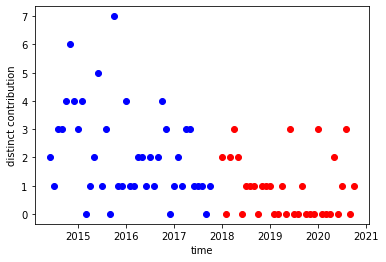

In [177]:
plt.scatter(tr_data['pull_creation_date'], tr_data['count'], color='blue')
plt.scatter(hld_data['pull_creation_date'], hld_data['count'], color='red')
plt.xlabel("time")
plt.ylabel("distinct contribution")
plt.show()

In [199]:
data['pull_creation_date'] = data['pull_creation_date'].values.astype(np.int64) // 10 ** 9

array([1401494400, 1409443200, 1417305600, 1425081600, 1433030400,
       1440979200, 1448841600, 1456704000, 1464652800, 1472601600,
       1480464000, 1488240000, 1496188800, 1504137600, 1512000000])

In [209]:
import statsmodels.api as sm

data = train.groupby(pd.Grouper(key='pull_creation_date', freq='3M')).size().reset_index(name='count')
data['pull_creation_date'] = data['pull_creation_date'].values.astype(np.int64) // 10 ** 9
X = sm.add_constant(data['pull_creation_date'])
model = sm.OLS(data['count'], X)
results = model.fit()
results.summary()

/home/h3keshav/anaconda3/envs/coc/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     4.803
Date:                Wed, 28 Jul 2021   Prob (F-statistic):             0.0472
Time:                        11:25:57   Log-Likelihood:                -38.237
No. Observations:                  15   AIC:                             80.47
Df Residuals:                      13   BIC:                             81.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 88.1291     36.692      2.402      0.032       8.860     167.398
pull_creation_date -5.519e-08   2.52e-08     -2.192      0.047    -1.1e-07   -7.89e-10
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.138
Skew:                          -0.214   Prob(JB):                        0.933
Kurtosis:                       2.808   Cond. No.                     6.23e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
# data = holdout.groupby(pd.Grouper(key='pull_creation_date', freq='3M')).size().reset_index(name='count')
# data['pull_creation_date'] = data['pull_creation_date'].values.astype(np.int64) // 10 ** 9
y_predict = results.params[0] + results.params[1] * data['pull_creation_date']
y_predict

0     10.782502
1     10.343818
2      9.909903
3      9.480756
4      9.042073
5      8.603389
6      8.169474
7      7.735559
8      7.296875
9      6.858191
10     6.424276
11     5.995129
12     5.556446
13     5.117762
14     4.683847
Name: pull_creation_date, dtype: float64

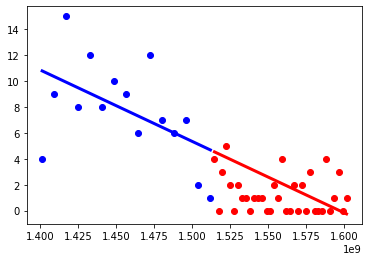

In [215]:
hld_data = holdout.groupby(pd.Grouper(key='pull_creation_date', freq='M')).size().reset_index(name='count')
hld_data['pull_creation_date'] = hld_data['pull_creation_date'].values.astype(np.int64) // 10 ** 9

plt.scatter(data['pull_creation_date'], data['count'], color='blue')
plt.scatter(hld_data['pull_creation_date'], hld_data['count'], color='red')
plt.plot(data['pull_creation_date'], y_predict, color='blue', linewidth=3)
plt.plot(hld_data['pull_creation_date'], results.params[0] + results.params[1] * hld_data['pull_creation_date'], color='red', linewidth=3)

In [219]:
f4

,repository_url,user_login,user_name,user_location,pull_number,pull_current_state,pull_creation_date,pull_closing_date,pull_merged,pull_merge_date,...,disagree,adoption_date,start_date,end_date,is_person,forks,stars,total_contributors,size,age
2382,jquery/jquery,csmadhav,C S Madhav,hyderabad,4405,open,2019-05-19 20:01:04,NaN,False,NaN,...,True,2017-11-27 11:41:00,2014-05-18 23:22:00,2021-06-08 00:00:00,True,20027,55103,283,30932,384338386
2385,jquery/jquery,preethi26,Preethi Pravalika,india,3501,open,2017-01-16 09:21:15,NaN,False,NaN,...,True,2017-11-27 11:41:00,2014-05-18 23:22:00,2021-06-08 00:00:00,True,20027,55103,283,30932,384338386
2426,jquery/jquery,qixinwuchen,Lucy,NaN,4785,closed,2020-09-05 09:19:58,2020-09-05 09:25:18,False,NaN,...,True,2017-11-27 11:41:00,2014-05-18 23:22:00,2021-06-08 00:00:00,True,20027,55103,283,30932,384338386
2438,jquery/jquery,natipo,Natalia Sroka,NaN,4757,closed,2020-07-21 12:56:35,2020-07-27 20:01:56,True,2020-07-27 20:01:56,...,True,2017-11-27 11:41:00,2014-05-18 23:22:00,2021-06-08 00:00:00,True,20027,55103,283,30932,384338386
2441,jquery/jquery,Necmttn,Necmettin Karakaya,Bali,4752,closed,2020-07-18 13:19:35,2020-07-22 14:12:55,True,2020-07-22 14:12:54,...,True,2017-11-27 11:41:00,2014-05-18 23:22:00,2021-06-08 00:00:00,True,20027,55103,283,30932,384338386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192823,fabricjs/fabric.js,pawelnguyen,Paweł Nguyen,Warsaw,174,closed,2012-06-05 12:37:35,2012-06-08 10:34:29,False,NaN,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192824,fabricjs/fabric.js,konieczkow,Maciek Gajewski,"London, UK",170,closed,2012-05-29 11:23:07,2012-05-30 11:52:44,True,2012-05-30 11:52:44,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192825,fabricjs/fabric.js,konieczkow,Maciek Gajewski,"London, UK",169,closed,2012-05-29 10:47:27,2012-05-29 10:57:01,True,2012-05-29 10:57:01,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122
192830,fabricjs/fabric.js,baltauger,Balthazar Auger,Buenos Aires,155,closed,2012-04-24 21:06:49,2012-05-13 14:43:06,True,2012-05-13 14:43:06,...,True,2015-06-20 02:31:44,2010-06-09 22:24:38,2020-06-29 06:38:50,True,2774,19091,235,126777,346988122


In [309]:
f4_num = f4['creation_date'].values.astype(np.int64) // 10 ** 9
min_creation = f4_num.min()
data_collection = int(datetime.datetime(2021, 6, 8).timestamp())
print(data_collection)
data_collection = pd.to_datetime('2021/06/08').value
print(data_collection)
data_collection = pd.Timestamp(2021, 6, 8).value
print(data_collection)
# datetime.datetime.fromtimestamp(data_collection).strftime('%Y-%m')

1623124800
1623110400000000000
1623110400000000000


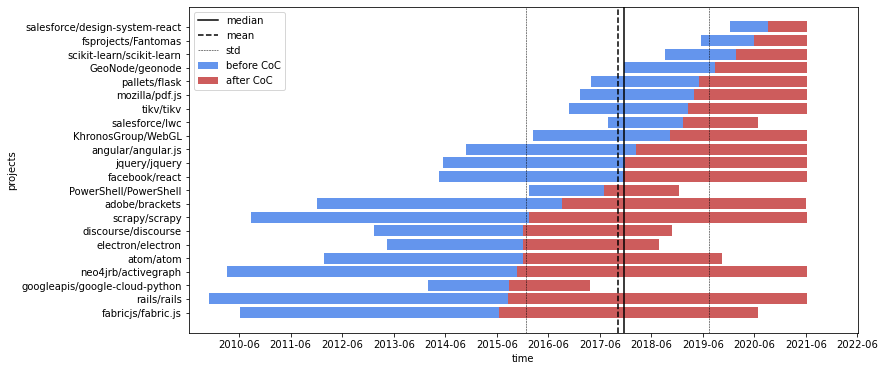

In [312]:
from matplotlib import dates

unique_f4 = f4.drop_duplicates(['repository_url'])
unique_f4 = unique_f4.sort_values('adoption_date')
fig, gnt = plt.subplots(figsize=(12,6))
# gnt.set_ylim(0, len(unique_f4['repository_url'].unique()) + 1)
gnt.set_xlim([datetime.date(2009, 6, 8), datetime.date(2022, 6, 8)])
gnt.set_xlabel('time')
gnt.set_ylabel('projects')
hfmt = dates.DateFormatter('%Y-%m')
gnt.xaxis.set_major_formatter(hfmt)
fmt_half_year = dates.MonthLocator(interval=12)
gnt.xaxis.set_major_locator(fmt_half_year)
plt.axvline(unique_f4['adoption_date'].median(), color='k', linewidth=1.5, label='median')
plt.axvline(unique_f4['adoption_date'].mean(), color='k', linestyle='dashed', linewidth=1.5, label='mean')
plt.axvline(unique_f4['adoption_date'].mean() + unique_f4['adoption_date'].std(), color='k', linestyle='dashed',
            linewidth=0.5, label='std')
plt.axvline(unique_f4['adoption_date'].mean() - unique_f4['adoption_date'].std(), color='k', linestyle='dashed',
            linewidth=0.5)

plt.barh(y=unique_f4['repository_url'], left=unique_f4['start_date'],
         width=unique_f4['adoption_date'] - unique_f4['start_date'], color='cornflowerblue', label='before CoC')
plt.barh(y=unique_f4['repository_url'], left=unique_f4['adoption_date'],
         width=unique_f4['end_date'] - unique_f4['adoption_date'], color='indianred', label='after CoC')
plt.legend(loc="upper left")
plt.show()

In [323]:
hist_data = df[~df['repository_url'].isin(['rails/rails', 'TryGhost/ghost'])].groupby('repository_url').size().reset_index(name='count').sort_values('count', ascending=False)

In [332]:
data = df[~df['repository_url'].isin(['rails/rails', 'TryGhost/ghost'])]

In [335]:
wo = data[data['adoption_date'].isnull()]['repository_url'].unique().tolist()
w = data[~data['adoption_date'].isnull()]['repository_url'].unique().tolist()
wo

['vercel/hyper',
 'TheAlgorithms/Java',
 'opencv/opencv',
 'alacritty/alacritty',
 'moment/moment',
 'moby/moby',
 'ytdl-org/youtube-dl',
 'caddyserver/caddy',
 'airbnb/javascript',
 'TryGhost/Ghost',
 'github/gitignore']

<BarContainer object of 32 artists>


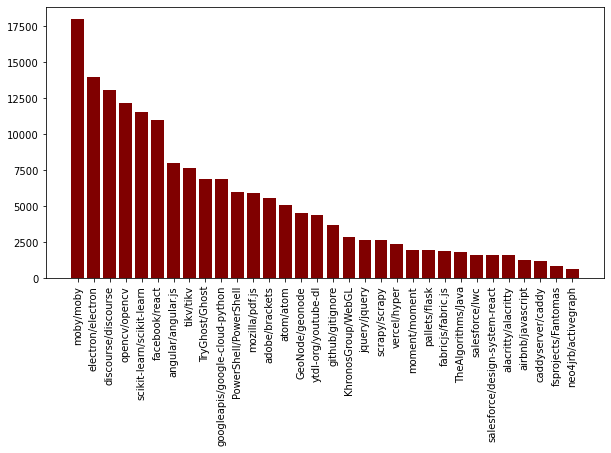

In [336]:
fig = plt.figure(figsize = (16, 6))
 
bar_list = plt.bar(hist_data['repository_url'], hist_data['count'], color ='maroon')
plt.xticks(rotation=90)
print(bar_list)
plt.show()